<a href="https://colab.research.google.com/github/Alop1/AI_random_forest/blob/master/Pola/Workspace_1_workingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!ls
!cd '/content/gdrive/My Drive/FailOmen'

gdrive	sample_data


In [0]:
import pandas as pd

#Importing dataset
dataset = pd.read_csv('/content/gdrive/My Drive/FailOmen/convertDataToML.csv', index_col=False)

In [0]:
x = dataset.iloc[:, 0:23739].values
y = dataset.iloc[:, 23739:24281].values

In [0]:
failCount = 0
passCount = 0
failBuildCount = 0

for a in y:
  if a[np.argmin(a)] == 0 : failBuildCount += 1
  for b in a:
    if b == 0 : failCount += 1
    if b == 1 : passCount += 1
print (failBuildCount)
print (failCount)
print (passCount)
print (failCount / passCount * 100, '%', sep='')

## **UTILITIES:**


---

In [0]:
def count_distribution(prediction):
  #Distributions of argmins through all the predictions
  i = 1
  tab = [0] * 542
  for a in prediction:
    j = 0
    for b in a:
      if b < 1.0 : j = j + 1

    #print (i, '. ', j, np.argmin(a))
    tab[np.argmin(a)] += 1
    i = i + 1

  i = 0
  number_of_tests =  542
  distributed_array = [0 for iterator in range(number_of_tests)]
  for a in tab:
    if a > 0 : 
      pass
#       print ('position', i, '\targmin count', a)
      distributed_array[i] = a
    i += 1
#   print (i)
  create_plot(range(len(distributed_array)), distributed_array)  
  return distributed_array


In [0]:
def create_plot(x_data, y_data=0):
  import matplotlib.pyplot as plt
  if y_data == 0:  
    unzip = list(zip(*x_data))
    x_data, y_data = unzip[0],unzip[1]
    print (x_data)
    print ("\n", y_data)
  
  plt.bar(x_data, y_data, align='center', alpha=1, width = 3)
  plt.xlabel("test no")
  plt.ylabel("how many times test was predicted as probably failed")
  plt.show()

uwaga, w funkcji ponizej searchForFailed(), w wyborze dodania spassowanych testow do trainig/testing set-a, mino ze podajemy dokladny procent z spassowanych danych jaki chcemy wykorzysatc, procet ten moze sie roznic w rzeczywistosci. Spowodowane jest to warunkiem modulo, np 20% bedzie 20%, 90% bedzie 100% 

 

In [0]:
def searchForFailed(yList, percent_of_passed_data=20, withpassed_data=False): 
  changedRowList = []
  period_counter_for_passedData = 0
  for row in range (len(yList)):
    if 0 in yList[row]:
      changedRowList.append(row)
      continue
    elif withpassed_data == True: 
      modulo_arg = int(1/(percent_of_passed_data/100))
      if not (period_counter_for_passedData%modulo_arg):
        changedRowList.append(row)
    period_counter_for_passedData += 1
      
  return changedRowList

def returnFailedData(xList, yList, changedRowList):
  xFailed = []
  yFailed = []
  
  for row in changedRowList:
    xFailed.append(xList[row])
    yFailed.append(yList[row])
  xFailed = np.array(xFailed)
  yFailed = np.array(yFailed)
  return xFailed, yFailed

In [0]:
def failsCount():
  fala = 0
  for i, a in enumerate(yTest):
    j = 0
    for k, b in enumerate(a):
      if b < 1.0 : j += 1

    if j > 0 : 
      print (i, '. ', j)
    i = i + 1
    fala += j
  print (fala)

In [0]:
# Evaluation function

def evaluation(predictions,additionalPredictions, refYsupervisor):
  
  lenght = len(refYsupervisor)

  failPositions = [[] for y in range(lenght)]

  for i, a in enumerate(refYsupervisor):

    for j, b in enumerate(a):
      if b == 0 : failPositions[i].append(j);#spisuje w listach(per commit) pozycje, gdzie sfailowal test [3,78,90, itp]

  predictionsTemp = predictions.copy()#tablica list, w ktotej sa przedstawione prawd wystapienia danej labeliki
  # todo 
  #prediction_real byl juz listo po powrotnym mapowaniu, zlozona z testow (czyli ich indeksami 1-542)do sailowania , od najbardziej prawdopodobnych do najmniej 
  
  
#   print(predictionsTemp) 
#   print(type(predictionsTemp))
#   print(len(predictionsTemp))
#   print(predictionsTemp[0])
#   print(predictionsTemp[0][0])
  predictionPositions = [[] for y in range(lenght)]


  for i, commit in enumerate(predictionsTemp):

    if len(failPositions[i]) != 0:#jezeli w danym commicie byl wh jakis blad
      for j in range(len(failPositions[i]) + additionalPredictions):#tyle razy co sfailowanych testow + dodatkowe, przez nas zdefiniowane
        argmin = np.argmin(commit)# argmin = jest indeksem najmniejsza wartoscia dla predykcji sieci , czyt. indexem najbardziej prawdopodobnej
        predictionPositions[i].append(argmin)#umiesc index tej  najbardziej prawdopodobna wartosc, w tab dla danego komitu 
        predictionsTemp[i][argmin] = 1#nie berz pod uwage juz tej wartosci

  predictionHits = [[] for y in range(lenght)]

  for i, a in enumerate(failPositions):
    count = 0
    for j, b in enumerate(a):


      for c in predictionPositions[i]:
  #      predictionHits[i].append(predictions[i][c].copy())
  #      print(predictions[i][c])
  #      print(predictions[i][c])
  #      print (b, c)
        if c == b : count += 1

    if len(failPositions) != 0:
      predictionHits[i].insert(0,count)


  failsCount = 0
  hitsCount = 0
  for i, a in enumerate(refYsupervisor):
    j = 0

    for k, b in enumerate(a):
      if b < 1.0 : j += 1

  #  if j > 0 :
  #    print (i, '.', j, predictionHits[i])


    failsCount += j
    hitsCount += predictionHits[i][0]

  print('Percentage of fails predicted', hitsCount / failsCount * 100, '%')

In [0]:
def listSingleMemberClassesPositions(refY, printFlag):

  yList = refY.tolist()
  print (len(yList))
  yDistinct = [ele for ind, ele in enumerate(yList) if ele not in yList[:ind]]

  classesPopulation = []
  singleMemberClassesPositions = []
  noSingleMemberClasses = 0

  for i, a in enumerate(yDistinct):
    population = 0
    memberPosition = 0
    for j, b in enumerate(yList):
      if a == b: 
        population += 1
        memberPosition = j

    classesPopulation.append(population)
  #  print(i, population)
    if population == 1: 
      noSingleMemberClasses += 1
      singleMemberClassesPositions.append(memberPosition)

  if printFlag == True: 
    print(noSingleMemberClasses)
  else:
    return singleMemberClassesPositions
  




---



---



---



## **PREPARE DATA**

In [0]:
#xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

**(optional) create only 'failed data'**

In [15]:
import numpy
xReduced, yReduced = returnFailedData(x, y, searchForFailed(y,percent_of_passed_data=1,withpassed_data=True))
print ('type', type(yReduced[0]))

yReduced_temp = yReduced.tolist()
real_classes = [(ele) for ind, ele in enumerate(yReduced_temp) if ele not in yReduced_temp[:ind]]
nn_classes = []

# # create nn_classes
# for i in range(542):
#   temp_nn_class = [1 for iterator in range(542)]
#   temp_nn_class[i] = 0
#   nn_classes.append(temp_nn_class)  
# # create mapper  
# class_mapper = []
# i = 0 

# # create mapper
# class_mapper = [tuple((real_class, nn_classes[i])) for i, real_class in enumerate(real_classes)]


# print(class_mapper[1][1])
# # create new supervisor  
# temp_mapped_supervisor = []  
# for real_row in yReduced_temp:
#   for mapper_row in class_mapper:
#     if real_row == mapper_row[0]:
#       temp_mapped_supervisor.append(mapper_row[1])
      
# #map to numpy array      
# mapped_supervisor=numpy.array([numpy.array(xi) for xi in temp_mapped_supervisor])
  
    

# xReduced, yReduced = returnFailedData(x, y, searchForFailed(y))
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xReduced, yReduced, test_size = 0.2)

type <class 'numpy.ndarray'>


In [16]:
def listSingleMemberClassesPositions(refY, printFlag):
  

  yList = refY.tolist()#dalej maciez tylko jako lista
  yDistinct = [(ele) for ind, ele in enumerate(yList) if ele not in yList[:ind]]#tablica vektorow gdzie jest cos nowego 
#   print(len(yDistinct[0]))# pojedynczy kommit  nie powtarzajacy sie juz pozniej 
  print("liczba 'klas'", len(yDistinct))
  
  data_for_directory = []
  classesPopulation = []
  singleMemberClassesPositions = []
  noSingleMemberClasses = 0

  for i, a in enumerate(yDistinct):
    population = 0
    memberPosition = 0
    for j, b in enumerate(yList):
      if a == b: 
        population += 1
        memberPosition = j

    classesPopulation.append(population)
  #  print(i, population)
    if population == 1:
      ids_in_single_popul  = [idx for idx, ele in enumerate(a) if ele == 0]
      data_for_directory.append(ids_in_single_popul)
      noSingleMemberClasses += 1
      singleMemberClassesPositions.append(memberPosition)
      
  ids_for_class= []    
  for i in range(0,len(data_for_directory)):
    if i == 0:
      ids_for_class = data_for_directory[i]
    ids_for_class += list(set(data_for_directory[i])- set(ids_for_class))
 
 

  if printFlag == True: 
    print(noSingleMemberClasses)
  else: 
    return (singleMemberClassesPositions,ids_for_class)
  
info = listSingleMemberClassesPositions(yTrain, False)#czy to sa numery klas (w naszym przypadku testow,) czy numery komitow gdzie tylko jeden test sfailowal => to drugie numery kommitow
  
def create_weights_dict(yTrain, info):
  basic_class_weights = {}
  
  basic_class_weights = {i:1. for i in range(len(yTest))}
  
  for ids in info[1]:
    basic_class_weights[ids] = 5
  print(basic_class_weights)
  return basic_class_weights

 
  
class_weights = create_weights_dict(yTrain, info)
  

liczba 'klas' 261
{0: 1.0, 1: 5, 2: 5, 3: 5, 4: 5, 5: 1.0, 6: 5, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 5, 12: 1.0, 13: 1.0, 14: 1.0, 15: 5, 16: 5, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 5, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 5, 31: 1.0, 32: 5, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 5, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 5, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 5, 56: 1.0, 57: 1.0, 58: 1.0, 59: 5, 60: 1.0, 61: 1.0, 62: 5, 63: 1.0, 64: 5, 65: 1.0, 66: 5, 67: 5, 68: 5, 69: 1.0, 70: 5, 71: 5, 72: 5, 73: 5, 74: 5, 75: 5, 76: 5, 77: 1.0, 78: 5, 79: 5, 80: 1.0, 81: 5, 82: 1.0, 83: 1.0, 84: 1.0, 85: 1.0, 86: 1.0, 87: 1.0, 88: 5, 89: 5, 90: 5, 91: 5, 92: 5, 93: 1.0, 94: 5, 95: 5, 96: 5, 97: 5, 98: 1.0, 99: 1.0, 100: 1.0, 101: 1.0, 102: 5, 103: 1.0, 104: 5, 105: 1.0, 106: 1.0, 107: 5, 108: 1.0, 109: 1.0, 110: 1.0, 111: 1.0, 112: 1.0, 113: 1.0, 114: 1.0, 115: 1.0, 116: 1.0, 117: 

In [0]:
#slownik przyklad :
# class_weight = {0: 1.,
#                 1: 50.,
#                 2: 2.}



In [17]:
def count_fail_to_pass_ratio(refy):
  failCount = 0
  passCount = 0
  failBuildCount = 0

  for a in y:
    if a[np.argmin(a)] == 0 : failBuildCount += 1
  print ("To training were used data : ")
  print ("failed builds: ", failBuildCount)
  passed_builds = len(refy) - failBuildCount
  print('passed builds: ', passed_builds)
  print ("failed to passed  ratio: ", failBuildCount / passed_builds * 100, '%', sep='')
  
  
count_fail_to_pass_ratio(yReduced)
  

  
  

To training were used data : 
failed builds:  632
passed builds:  42
failed to passed  ratio: 1504.7619047619048%




---



---



---



## PREPARE MODEL

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#12140
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(6070, activation="sigmoid", input_dim=23739, kernel_initializer="uniform")) # TRY smaller input_dim value or less neurons
# Adding the second hidden layer
#model.add(Dense(12140, activation = "sigmoid", kernel_initializer="uniform"))
# Adding the output layer
model.add(Dense(542, activation="sigmoid", kernel_initializer="uniform"))

In [33]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# 
model.fit(xTrain, yTrain, batch_size = 20, epochs = 15)
# model.fit(xTrain, yTrain, batch_size = 20, epochs = 15, class_weight=class_weights)

Epoch 1/15
539/539 [==============================] - 8s 15ms/step - loss: 0.0627 - acc: 0.9785
Epoch 2/15
539/539 [==============================] - 5s 9ms/step - loss: 0.0255 - acc: 0.9974
Epoch 3/15
539/539 [==============================] - 5s 9ms/step - loss: 0.0208 - acc: 0.9974
Epoch 4/15
539/539 [==============================] - 5s 9ms/step - loss: 0.0188 - acc: 0.9975
Epoch 5/15
539/539 [==============================] - 5s 9ms/step - loss: 0.0172 - acc: 0.9976
Epoch 6/15
539/539 [==============================] - 5s 9ms/step - loss: 0.0165 - acc: 0.9977
Epoch 7/15
539/539 [==============================] - 5s 9ms/step - loss: 0.0159 - acc: 0.9977
Epoch 8/15
539/539 [==============================] - 5s 9ms/step - loss: 0.0155 - acc: 0.9978
Epoch 9/15
539/539 [==============================] - 5s 9ms/step - loss: 0.0152 - acc: 0.9978
Epoch 10/15
539/539 [==============================] - 5s 9ms/step - loss: 0.0146 - acc: 0.9979
Epoch 11/15
539/539 [===========================



---



---



---



## **TEST MODEL**

In [0]:
# lossTest, accTest = model.evaluate(xTest, yTest)

# print('Test accuracy:', accTest)
# print('Test loss:', lossTest)


In [0]:

# predictions = model.predict(xTest)
predictions = model.predict(xTest)
# print (predictions[0])
# print(len(predictions))
# print((len(predictions)))



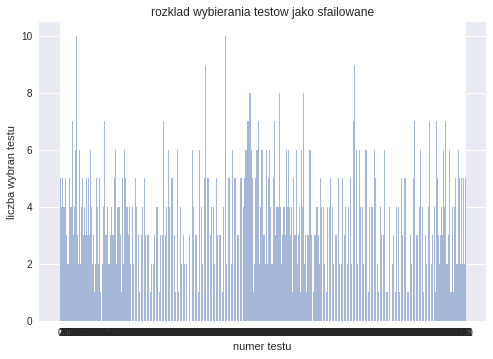

In [35]:
def create_fake_predictions(quantity_oftests_set_as_failed, quantity_of_predictions):
  import random
  quantity_of_predictions = len(quantity_of_predictions)
  random_matrix_pred = []
  stats =  [0 for i in range(542)]
  
  for row_no in range(quantity_of_predictions):
    random_pred_list = [1 for i in range(542)]
    random_indexes_list = [random.randint(0,541) for i in range(quantity_oftests_set_as_failed)] # todo usunac powtorzenia 
    for idx in random_indexes_list:
      random_pred_list[idx] = 0
      stats[idx] = stats[idx] + 1
    random_matrix_pred.append(random_pred_list)

# for new concept
#   for row_no in range(quantity_of_predictions):
#       random_pred_list = [1 for i in range(542)]
#       random_indexes_list = random.randint(0,541) # todo usunac powtorzenia 
#       random_pred_list[random_indexes_list] = 0
#       stats[random_indexes_list] = stats[random_indexes_list] + 1
#       random_matrix_pred.append(random_pred_list)
    
  y_pos = range(len(stats))
  performance = stats

  plt.bar(y_pos, performance, align='center', alpha=0.5)
  plt.xticks(y_pos)
  plt.ylabel('liczba wybran testu')
  plt.xlabel('numer testu')
  plt.title('rozklad wybierania testow jako sfailowane')
  plt.show()
    
 
  random_matrix_pred = np.array(random_matrix_pred)
  return random_matrix_pred


fake_predictions_matrix = create_fake_predictions(15,xTest) 


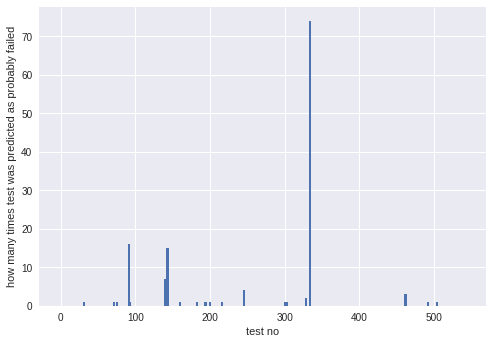

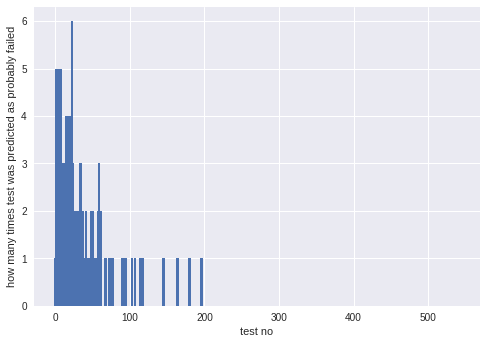

In [36]:
#Distributions of argmins through all the predictions
distribution_array = count_distribution(predictions)

# fake prediction
fake_distribution_array = count_distribution(fake_predictions_matrix)


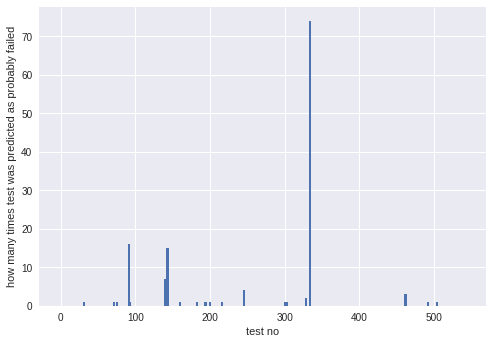

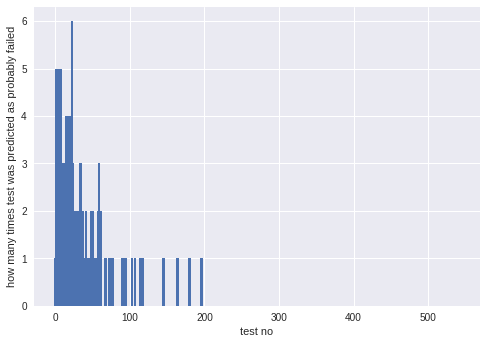

In [37]:
create_plot(range(len(distribution_array)), distribution_array)

# fake plot
create_plot(range(len(fake_distribution_array)), fake_distribution_array)

In [38]:
count_fail_to_pass_ratio(yReduced)
evaluation(predictions,15,yTest)
# evaluate random prediction
print("fake prediction: ")
evaluation(fake_predictions_matrix, 15, yTest)

To training were used data : 
failed builds:  632
passed builds:  42
failed to passed  ratio: 1504.7619047619048%
Percentage of fails predicted 20.812182741116754 %
fake prediction: 
Percentage of fails predicted 4.060913705583756 %
